In [2]:
import numpy as np 
from sklearn.datasets import fetch_covtype
import pandas as pd
from itertools import islice

## Create dataset

In [27]:
data, labels = fetch_covtype(return_X_y=True)
data_normal = data[labels == 2]
data_anom = data[labels == 4]
for f in range(data.shape[1]):
    n_unique = len(np.unique(data[:, f]))
    if n_unique > 2:
        print(f, n_unique)

0 1978
1 361
2 67
3 551
4 700
5 5785
6 207
7 185
8 255
9 5827


In [32]:
data, labels = fetch_covtype(return_X_y=True)
data = data[:, :10]
data_normal = data[labels == 2]
data_anom = data[labels == 4]
data_normal = list(zip(data_normal, np.zeros(len(data_normal), dtype=int)))
data_anom = list(zip(data_anom, np.ones(len(data_anom), dtype=int)))

seed = 42
np.random.seed(seed)


def random_chunk(li, min_chunk=2, max_chunk=10):

    it = iter(li)
    while True:
        nxt = list(islice(it, np.random.randint(min_chunk, max_chunk)))
        if nxt:
            yield nxt
        else:
            break


anom_chunks = list(random_chunk(data_anom))[::-1]
n_chunks = len(anom_chunks)
idcs = np.random.randint(0, len(data_normal), n_chunks)

idcs.sort()
idcs = idcs[::-1]

data_all = data_normal
for idx, chunk in zip(idcs, anom_chunks):
    data_all[idx:idx] = chunk


## Plot dataset

(-5.0, 5.0)

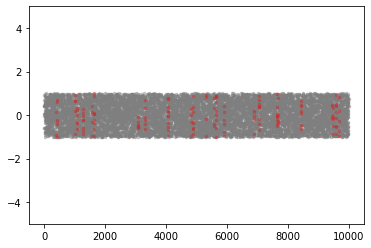

In [31]:
import matplotlib.pyplot as plt


subsample = 10000
size = 6
alpha = 0.4
labels_new = np.array([row[1] for row in data_all])[:subsample]
idcs_all = np.arange(subsample)
idcs_anom = idcs_all[labels_new == 1]
idcs_normal = idcs_all[labels_new == 0]

fig, ax = plt.subplots()
ax.scatter(idcs_normal, np.random.uniform(-1, 1, len(idcs_normal)), c="tab:gray", s=size, alpha=alpha)
ax.scatter(idcs_anom, np.random.uniform(-1, 1, len(idcs_anom)), c="tab:red", s=size, alpha=alpha)
ax.set_ylim(-5, 5)


## Save dataset

In [23]:
X = [row[0] for row in data_all]
y = [row[1] for row in data_all]

df = pd.DataFrame(X)
df["Is_Anomaly"] = y
df.to_csv("covertype.csv", index=False)